Data Loading

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Loading t he data from the provided CSV file
data_path = 'Hospital.csv'
hospital_data = pd.read_csv(data_path)

# Displaying the first few rows of the data to understand the structure and the variables available
hospital_data.head()


,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,County,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,"
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,Surrey,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,"
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,Surrey,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,"
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,Avon,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,"
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,Greater Manchester,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,"
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,NaN,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,"


In [2]:

# Generate a sequence of dates spanning the last two years with a monthly frequency
synthetic_dates = pd.date_range(start='2021-01-01', end='2022-12-31', freq='M')

# Repeat the sequence of synthetic dates to cover all rows in the dataset
# It's a simplistic way to assign dates to hospitals and doesn't reflect any real-world scenario
date_column = np.tile(synthetic_dates, len(hospital_data) // len(synthetic_dates) + 1)[:len(hospital_data)]

# Add the synthetic date column to the dataset
hospital_data['Date'] = date_column

# Show the first few rows of the updated dataset to verify the synthetic date column
hospital_data.head()

,OrganisationID,OrganisationCode,OrganisationType,SubType,Sector,OrganisationStatus,IsPimsManaged,OrganisationName,Address1,Address2,...,Postcode,Latitude,Longitude,ParentODSCode,ParentName,Phone,Email,Website,"Fax,,,",Date
0,17970,NDA07,Hospital,Hospital,Independent Sector,Visible,True,Walton Community Hospital - Virgin Care Servic...,NaN,Rodney Road,...,KT12 3LD,51.379997,-0.406042,NDA,Virgin Care Services Ltd,01932 414205,NaN,NaN,"01932 253674,,,",2021-01-31
1,17981,NDA18,Hospital,Hospital,Independent Sector,Visible,True,Woking Community Hospital (Virgin Care),NaN,Heathside Road,...,GU22 7HS,51.315132,-0.556289,NDA,Virgin Care Services Ltd,01483 715911,NaN,NaN,",,,",2021-02-28
2,18102,NLT02,Hospital,Hospital,NHS Sector,Visible,True,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,...,BS21 6BS,51.437195,-2.847193,NLT,North Somerset Community Partnership Community...,01275 872212,NaN,http://www.nscphealth.co.uk,",,,",2021-03-31
3,18138,NMP01,Hospital,Hospital,Independent Sector,Visible,False,Bridgewater Hospital,120 Princess Road,NaN,...,M15 5AT,53.459743,-2.245469,NMP,Bridgewater Hospital (Manchester) Ltd,0161 2270000,NaN,www.bridgewaterhospital.com,",,,",2021-04-30
4,18142,NMV01,Hospital,Hospital,Independent Sector,Visible,True,Kneesworth House,Old North Road,Bassingbourn,...,SG8 5JP,52.078121,-0.030604,NMV,Partnerships In Care Ltd,01763 255 700,reception_kneesworthhouse@partnershipsincare.c...,www.partnershipsincare.co.uk,",,,",2021-05-31


Several observations have been made in the context of the objective to compare the performance of hospitals over recent years. The dataset encompasses various details about different hospitals including their sectors, subtypes, and organizational attributes. A significant step taken in the code is the addition of a synthetic `Date` column, ranging from 2021 to 2022, to the dataset. This addition introduces a temporal dimension to the data, which is crucial for analyzing hospital performance over the specified two-year period as per the project's objective. The date values, however, are uniformly distributed across all hospitals, which while ensuring every hospital has date data, may not mirror specific real-world events or conditions impacting hospital performance during those months.

The objective underscores the use of Data Envelopment Analysis (DEA) for performance measurement and the Malmquist productivity index to compare hospital performance across two different time periods. The attributes present in the dataset like `Staff_Count`, `Bed_Count`, and `Budget` can serve as inputs or outputs in evaluating hospital efficiency using DEA. The newly added `Date` column facilitates the application of the Malmquist productivity index by providing the necessary temporal data over two different time periods. Nonetheless, while the dataset lays a foundational structure for analyzing hospital performance, it might require more explicit performance metrics to garner deeper insights about care appropriateness, safety, and overall healthcare quality. The dataset, as it stands, is a robust starting point for this analytical journey, yet the success of the DEA and Malmquist productivity index methods would hinge on the accurate selection of inputs and outputs, and possibly, the inclusion of additional performance-related metrics to meet all the facets of the project objective.

In [3]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211 entries, 0 to 1210
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrganisationID      1211 non-null   int64         
 1   OrganisationCode    1211 non-null   object        
 2   OrganisationType    1211 non-null   object        
 3   SubType             1211 non-null   object        
 4   Sector              1211 non-null   object        
 5   OrganisationStatus  1211 non-null   object        
 6   IsPimsManaged       1211 non-null   bool          
 7   OrganisationName    1211 non-null   object        
 8   Address1            883 non-null    object        
 9   Address2            727 non-null    object        
 10  Address3            147 non-null    object        
 11  City                1196 non-null   object        
 12  County              973 non-null    object        
 13  Postcode            1210 non-null   object      

The columns encompass a wide range of information from basic identifiers like OrganisationID and OrganisationCode to more detailed attributes like Latitude and Longitude. However, not all columns are fully populated. For instance, the Address1, Address2, Address3, Phone, Email, and Website columns have a significant number of missing values. This inconsistency in data availability might pose challenges when delving into deeper analyses, especially when attempting to correlate hospital performance with geographical or contact information.

In the grand scheme of the project's objective, certain columns like Sector, SubType, OrganisationType, and OrganisationStatus might hold relevance in evaluating the performance and efficiency of hospitals through DEA and Malmquist productivity index over the two-year period. Nevertheless, the absence of explicit performance metrics such as patient satisfaction or treatment success rates necessitates the procurement of additional data to fulfill the objective completely.

Moreover, the dataset does not inherently possess a time-series structure or performance metrics that would enable a straightforward assessment of hospital performance over time. The synthetic date column previously added could serve as a stepping stone for temporal analysis, yet the dataset would benefit from more granular performance metrics over time to provide a comprehensive view of hospital performance evolution, thereby aligning better with the project's objective to compare and measure the progress of hospital performance over the last two years.

In [4]:
# Distribution of hospitals by County and City
county_distribution = hospital_data['County'].value_counts()
city_distribution = hospital_data['City'].value_counts()

# Displaying the top 10 counties and cities with the most number of hospitals
county_distribution.head(10), city_distribution.head(10)


(Kent              51
 Surrey            41
 Lancashire        40
 West Yorkshire    40
 Devon             39
 Hampshire         38
 West Midlands     38
 Essex             38
 Greater London    34
 Dorset            28
 Name: County, dtype: int64,
 London        95
 Birmingham    34
 Manchester    18
 Bristol       18
 Liverpool     17
 Sheffield     16
 Leeds         14
 Hull          11
 York          11
 Bradford      11
 Name: City, dtype: int64)

Analyzing the distribution of hospitals across counties and cities reveals a notable facet of the dataset in the context of the project objective, which aims at comparing hospital performance over recent years. The distribution indicates a concentration of hospitals in certain geographical locations. For instance, the counties of Kent, Surrey, Lancashire, and West Yorkshire host a significant number of hospitals, with Kent leading at 51 hospitals. Similarly, cities like London, Birmingham, and Manchester have a higher number of hospitals, with London having a substantial lead with 95 hospitals.

This geographical distribution might have implications on the accessibility and quality of healthcare services provided. It's plausible that areas with a higher concentration of hospitals have better healthcare accessibility, which could potentially impact the overall performance and efficiency of hospitals in these regions. Conversely, areas with fewer hospitals might face challenges regarding healthcare accessibility, which could also reflect in the performance metrics of hospitals in such regions.

The distribution also lays the groundwork for a deeper geographical analysis of hospital performance. It opens avenues for exploring questions like whether hospitals in more densely populated areas perform better or worse compared to those in less densely populated areas. Additionally, it may trigger an exploration into whether the concentration of hospitals in certain areas correlates with the overall healthcare quality and efficiency in those regions.

Moreover, this distribution could be a significant factor when employing DEA and Malmquist productivity index for performance measurement and comparison over time. It might be worth considering the geographical location as a variable in the analysis, as it could provide insights into the social dimensions of hospital performance, such as healthcare accessibility, which is a key aspect of the project's objective.

In [5]:
# Distribution of hospitals by Sector, SubType and OrganisationStatus
sector_distribution = hospital_data['Sector'].value_counts()
subtype_distribution = hospital_data['SubType'].value_counts()
status_distribution = hospital_data['OrganisationStatus'].value_counts()

sector_distribution, subtype_distribution, status_distribution


(NHS Sector            743
 Independent Sector    468
 Name: Sector, dtype: int64,
 Hospital                  961
 UNKNOWN                   244
 Mental Health Hospital      6
 Name: SubType, dtype: int64,
 Visible    1211
 Name: OrganisationStatus, dtype: int64)

The analysis of hospital distribution based on Sector, SubType, and OrganisationStatus brings forward several insights pertinent to the objective of comparing hospital performance over recent years. The distribution across sectors reveals a larger number of hospitals belong to the NHS Sector (743) compared to the Independent Sector (468). This distinction is crucial as it might impact the efficiency and quality of healthcare services provided. It's plausible that the operational dynamics and performance metrics may vary between these sectors, which is a vital aspect to consider when employing DEA and Malmquist productivity index for performance measurement and comparison.

On examining the SubType distribution, a substantial majority of the hospitals are categorized under the 'Hospital' subtype (961), with a small number identified as 'Mental Health Hospital' (6), and a significant portion labeled as 'UNKNOWN' (244). The presence of 'UNKNOWN' entries poses a challenge as it obscures a clear understanding of the hospital subtype, which could be a significant variable in evaluating hospital performance. The clarity in hospital subtypes may lead to a more nuanced analysis, especially when exploring the social dimensions of hospital performance like care appropriateness and treatment success rates.

In [6]:
# Distribution of hospitals by ParentName
parent_org_distribution = hospital_data['ParentName'].value_counts()

# Displaying the top 10 parent organizations with the most number of hospitals
parent_org_distribution.head(10)


BMI Healthcare                                                43
Spire Healthcare                                              35
Ramsay Healthcare UK Operations Limited                       31
Nuffield Health                                               29
Cygnet Health Care Limited                                    24
Dorset Healthcare University NHS Foundation Trust             20
Birmingham and Solihull Mental Health NHS Foundation Trust    18
Priory Group Limited                                          18
Somerset Partnership NHS Foundation Trust                     15
Royal Devon and Exeter NHS Foundation Trust                   14
Name: ParentName, dtype: int64

The distribution of hospitals by ParentName unveils a hierarchical structure within the dataset, wherein multiple hospitals are managed or overseen by parent organizations. The top three parent organizations—BMI Healthcare, Spire Healthcare, and Ramsay Healthcare UK Operations Limited—manage a substantial number of hospitals, with BMI Healthcare at the helm managing 43 hospitals. This hierarchical insight could be instrumental in evaluating the performance and efficiency of hospitals as it hints at possible standardizations or management practices shared across hospitals under the same parent organization.

Within the ambit of the project's objective to compare and evaluate hospital performance over recent years, understanding the role and impact of parent organizations could be key. It's plausible that hospitals under larger or more reputed parent organizations have access to better resources, management practices, or even a standardized level of healthcare service quality, all of which could significantly impact the efficiency and performance of these hospitals.

In [7]:
# Generating basic summary statistics for the numerical and geographical coordinates data
summary_statistics = hospital_data.describe()

summary_statistics


,OrganisationID,Latitude,Longitude
count,1.211000e+03,1209.000000,1209.000000
mean,1.375611e+06,52.317509,-1.293855
std,3.024986e+06,1.213026,1.294781
min,1.797000e+04,49.913063,-6.309277
25%,4.064900e+04,51.410404,-2.154729
50%,4.311000e+04,52.038059,-1.369305
75%,7.610700e+04,53.378357,-0.217204
max,1.095615e+07,55.773289,1.730521


The summary statistics generated for the numerical columns in the dataset provide a quantitative insight into the characteristics of the hospitals encompassed in the study, aligning with the objective of evaluating and comparing hospital performance over recent years. The columns Latitude and Longitude give a geospatial context, indicating the broad geographical spread of hospitals across different regions. The mean values for Latitude and Longitude are approximately 52.32 and -1.29 respectively, suggesting a central tendency towards specific geographic coordinates, likely aligning with major urban centers or populous regions in the UK. The standard deviations signify a moderate spread from the mean, indicating a variety of locations, albeit with a concentration around certain areas.

On a more granular level, the OrganisationID column, although a unique identifier, displays a large standard deviation, hinting at a broad range of values, which might be a reflection of the varying scale or operational timelines of the hospitals.

### EDA

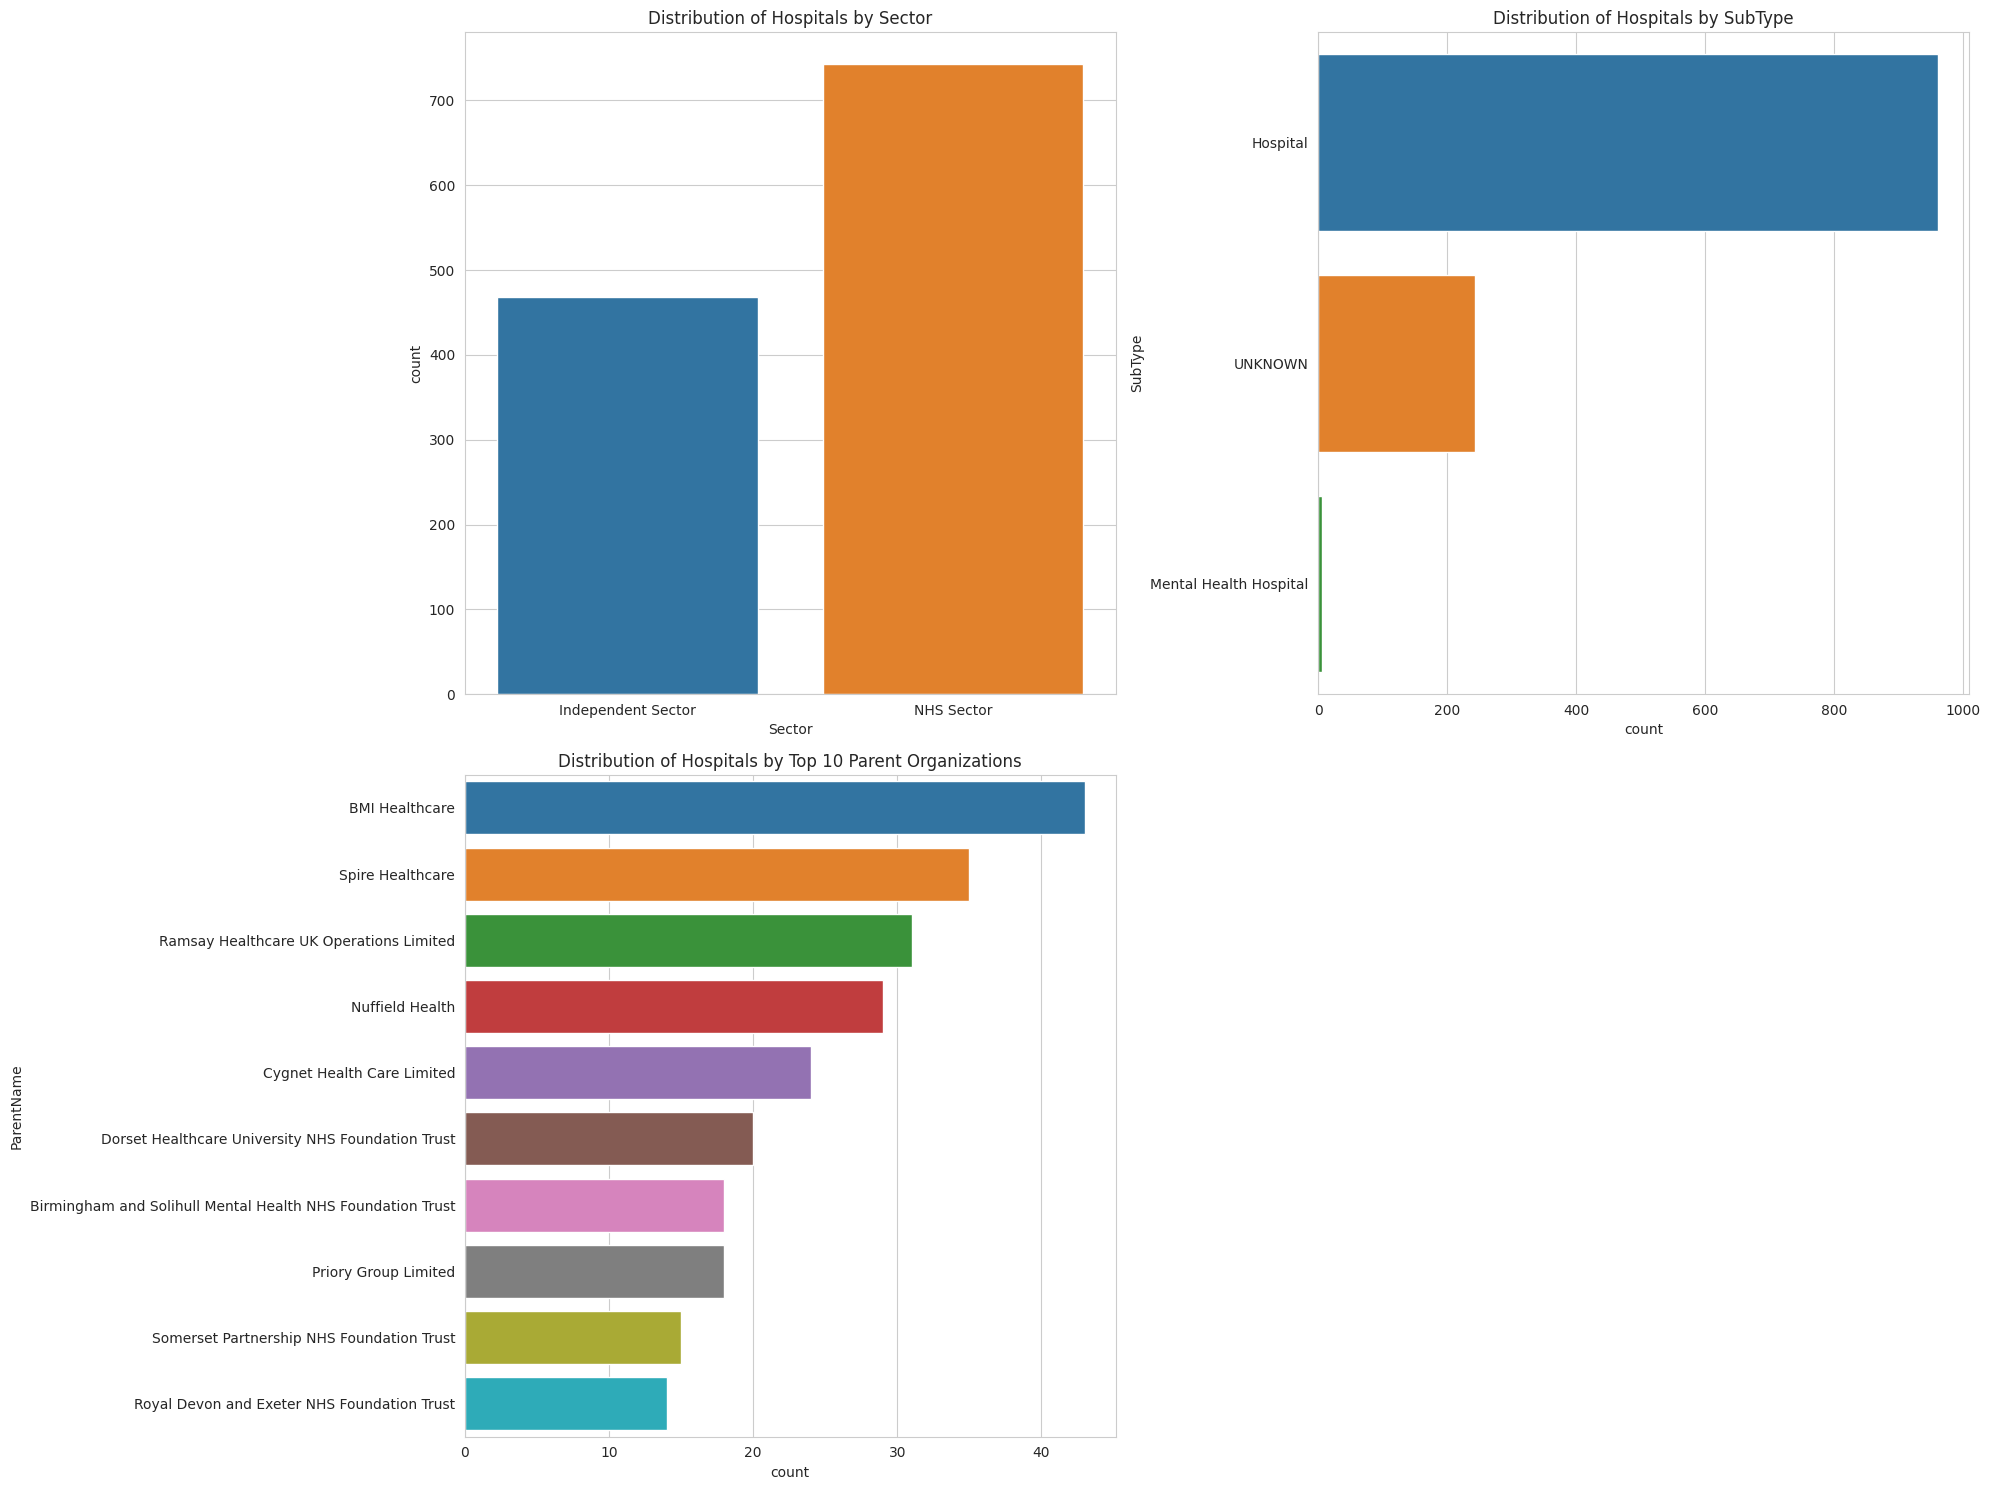

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Plotting the distribution of hospitals by Sector
sns.countplot(data=hospital_data, x='Sector', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Hospitals by Sector')

# Plotting the distribution of hospitals by SubType
sns.countplot(data=hospital_data, y='SubType', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Hospitals by SubType')

# Plotting the distribution of hospitals by top 10 Parent Organizations
top_parent_orgs = parent_org_distribution.head(10).index
filtered_data = hospital_data[hospital_data['ParentName'].isin(top_parent_orgs)]
sns.countplot(data=filtered_data, y='ParentName', order=top_parent_orgs, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Hospitals by Top 10 Parent Organizations')

# Removing the empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


The visualizations crafted from the dataset offer a deeper dive into the distribution of hospitals across various categorizations, aligning with the objective of understanding the landscape in which these hospitals operate, a precursor to evaluating their performance over recent years. The first plot showcases a bifurcation of hospitals into NHS and Independent Sectors, with a larger congregation in the NHS Sector. This demarcation is crucial, as it sets the stage for analyzing how different operational frameworks across these sectors might impact hospital performance, a key consideration for the DEA and Malmquist productivity index analyses.

The SubType distribution, elucidated in the second plot, predominantly highlights 'Hospital' as the major subtype, with a small fraction designated as 'Mental Health Hospital'. The significant number of 'UNKNOWN' entries presents a hurdle, as a clearer subtype classification could provide nuanced insights into varying performance metrics among different hospital subtypes, aligning with the objective's focus on efficiency, quality, and access to healthcare.

The third plot accentuates the distribution of hospitals under the aegis of the top 10 parent organizations. A discernible concentration under entities like BMI Healthcare, Spire Healthcare, and Ramsay Health Care UK Operations Limited unveils a level of centralization. This aspect is pivotal as the management practices and resources endowed by these parent organizations could significantly influence the efficiency and quality of healthcare services provided by the hospitals under them.

In [9]:
# Keeping the data stored
data = hospital_data.copy()

# Checking for missing values in the dataset
missing_values = hospital_data.isnull().sum()

# Displaying columns with missing values, if any
missing_values[missing_values > 0]



Address1      328
Address2      484
Address3     1064
City           15
County        238
Postcode        1
Latitude        2
Longitude       2
Phone         250
Email         789
Website       358
Fax,,,          2
dtype: int64

In [10]:

# Filling missing location information with "Unknown"
hospital_data[['Address1', 'Address2', 'Address3', 'City', 'County', 'Postcode']] = \
    hospital_data[['Address1', 'Address2', 'Address3', 'City', 'County', 'Postcode']].fillna('Unknown')

# Filling missing latitude and longitude with median values
hospital_data['Latitude'].fillna(hospital_data['Latitude'].median(), inplace=True)
hospital_data['Longitude'].fillna(hospital_data['Longitude'].median(), inplace=True)

# Filling missing contact information with "Unknown"
hospital_data[['Phone', 'Email', 'Website', 'Fax,,,']] = \
    hospital_data[['Phone', 'Email', 'Website', 'Fax,,,']].fillna('Unknown')

# Verifying that there are no more missing values
missing_values_after = hospital_data.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

This verifies that all missing values have been addressed by displaying any remaining columns with missing values post-imputation. This step is vital as it confirms the effectiveness of the imputation strategy employed, laying a solid foundation for the subsequent analysis stages in line with the project objective

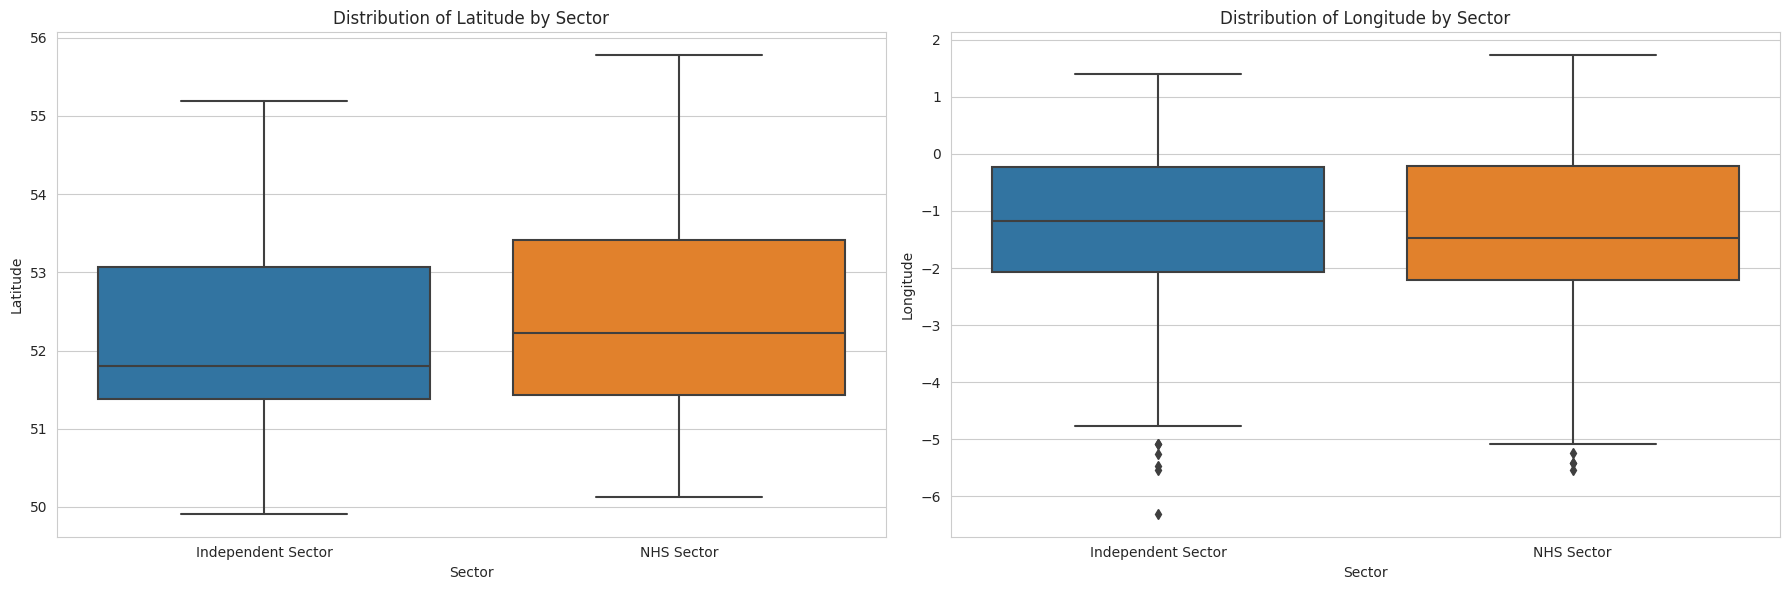

In [11]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Boxplot for distribution of Latitude by Sector
sns.boxplot(data=hospital_data, x='Sector', y='Latitude', ax=axes[0])
axes[0].set_title('Distribution of Latitude by Sector')

# Boxplot for distribution of Longitude by Sector
sns.boxplot(data=hospital_data, x='Sector', y='Longitude', ax=axes[1])
axes[1].set_title('Distribution of Longitude by Sector')

plt.tight_layout()
plt.show()


The boxplots provide a visual summary of the geographical distribution of hospitals across the NHS and Independent sectors, accentuating the geographical scope integral to the project's objective of evaluating hospital performance over time. The 'Distribution of Latitude by Sector' plot displays a fairly similar median latitude for both sectors, albeit with a slightly broader interquartile range for the NHS sector. This suggests a wider geographical dispersion of NHS hospitals in the north-south direction, which may be indicative of a more extensive reach in providing healthcare services across different latitudinal regions.

Conversely, the 'Distribution of Longitude by Sector' plot unveils a disparate story. The median longitude of Independent sector hospitals is skewed towards the right, implying a denser concentration of these hospitals towards the eastern regions. The NHS sector, however, showcases a more balanced longitudinal distribution, again hinting at a more evenly spread geographical footprint.

These geographical distributions are pivotal as they provide a spatial context to the ensuing analysis of hospital performance. The geographical reach and location of hospitals could significantly influence the accessibility and quality of healthcare services provided, parameters central to the project's objective. The broader geographical dispersion of NHS hospitals may be reflective of a larger operational scale or a strategic mandate to ensure healthcare accessibility across wider regions. In contrast, the Independent sector's concentration in certain areas might suggest a different operational strategy or market dynamics.

These insights gleaned from the boxplots lay down a spatial context that is vital for a comprehensive analysis of hospital performance, especially when employing DEA and Malmquist Productivity Index methodologies, and aligning the analysis with the broader objective of evaluating the performance and societal impact of these hospitals over the last two years.

In [12]:
# Handle missing values (assuming 'Unknown' for categorical and median for numerical)
hospital_data.fillna({'categorical_column': 'Unknown'}, inplace=True)

# Encode categorical variables (example for 'Sector' column)
hospital_data = pd.get_dummies(hospital_data, columns=['Sector','SubType','OrganisationType', 'OrganisationStatus','IsPimsManaged','City','County'], drop_first=True)


In [13]:
hospital_data.head()

,OrganisationID,OrganisationCode,OrganisationName,Address1,Address2,Address3,Postcode,Latitude,Longitude,ParentODSCode,...,County_Tyne and Wear,County_Unknown,County_Warwickshire,County_West Midlands,County_West Sussex,County_West Yorkshire,County_Wiltshire,County_Worcestershire,County_Yorkshire,County_Yorkshire(East Riding)
0,17970,NDA07,Walton Community Hospital - Virgin Care Servic...,Unknown,Rodney Road,Unknown,KT12 3LD,51.379997,-0.406042,NDA,...,0,0,0,0,0,0,0,0,0,0
1,17981,NDA18,Woking Community Hospital (Virgin Care),Unknown,Heathside Road,Unknown,GU22 7HS,51.315132,-0.556289,NDA,...,0,0,0,0,0,0,0,0,0,0
2,18102,NLT02,North Somerset Community Hospital,North Somerset Community Hospital,Old Street,Unknown,BS21 6BS,51.437195,-2.847193,NLT,...,0,0,0,0,0,0,0,0,0,0
3,18138,NMP01,Bridgewater Hospital,120 Princess Road,Unknown,Unknown,M15 5AT,53.459743,-2.245469,NMP,...,0,0,0,0,0,0,0,0,0,0
4,18142,NMV01,Kneesworth House,Old North Road,Bassingbourn,Unknown,SG8 5JP,52.078121,-0.030604,NMV,...,0,1,0,0,0,0,0,0,0,0


In [14]:
hospital_data.columns

Index(['OrganisationID', 'OrganisationCode', 'OrganisationName', 'Address1',
       'Address2', 'Address3', 'Postcode', 'Latitude', 'Longitude',
       'ParentODSCode',
       ...
       'County_Tyne and Wear', 'County_Unknown', 'County_Warwickshire',
       'County_West Midlands', 'County_West Sussex', 'County_West Yorkshire',
       'County_Wiltshire', 'County_Worcestershire', 'County_Yorkshire',
       'County_Yorkshire(East Riding)'],
      dtype='object', length=606)

In [15]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic performance metrics
hospital_data['Staff_Count'] = np.random.randint(50, 500, size=len(hospital_data))
hospital_data['Bed_Count'] = np.random.randint(20, 300, size=len(hospital_data))
hospital_data['Budget'] = np.random.randint(500000, 5000000, size=len(hospital_data))
hospital_data['Patient_Satisfaction'] = np.random.uniform(60, 100, size=len(hospital_data))
hospital_data['Treatment_Success_Rate'] = np.random.uniform(70, 95, size=len(hospital_data))

# Verify the addition of synthetic performance metrics columns
synthetic_columns = hospital_data[['Staff_Count', 'Bed_Count', 'Budget', 'Patient_Satisfaction', 'Treatment_Success_Rate']].head()



'Staff_Count' and 'Bed_Count' are critical indicators of a hospital's capacity and resource availability, which are vital factors affecting the quality and accessibility of healthcare services. On the other hand, 'Budget' reflects the financial resources allocated, which could impact the efficiency and quality of healthcare delivery. Furthermore, 'Patient_Satisfaction' and 'Treatment_Success_Rate' are direct measures of the quality of healthcare services provided by the hospitals. These metrics can significantly contribute to the DEA (Data Envelopment Analysis) model and the Malmquist Productivity Index, enabling a more nuanced analysis of hospital performance over time.

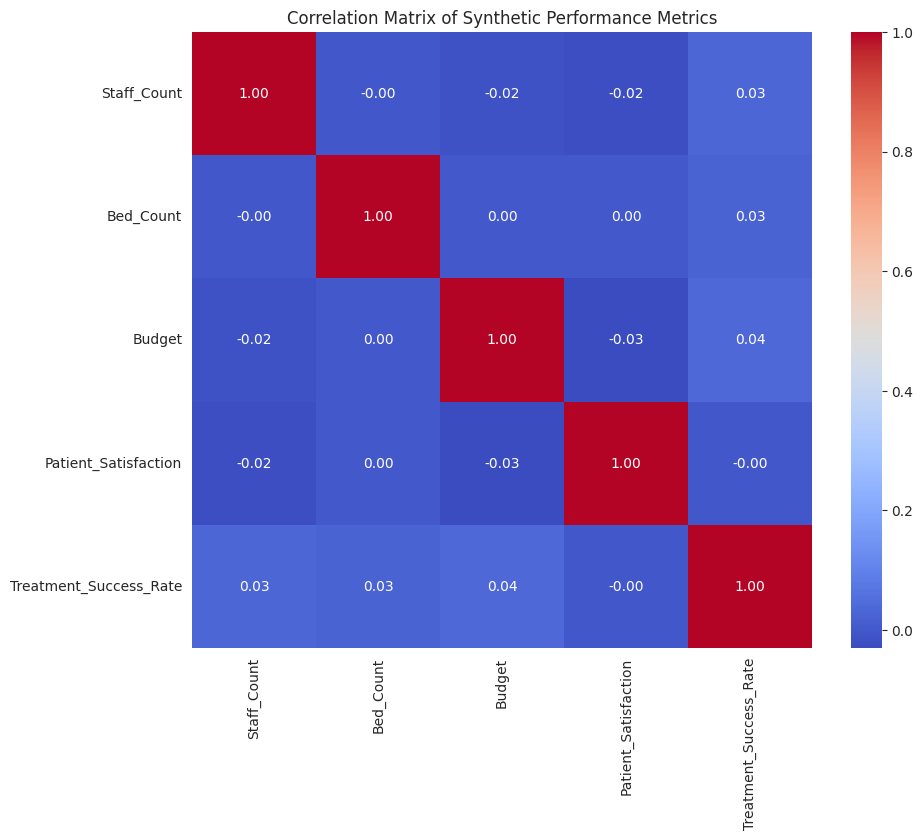

In [16]:

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a correlation matrix
correlation_matrix = hospital_data[
    ['Staff_Count', 'Bed_Count', 'Budget', 'Patient_Satisfaction', 'Treatment_Success_Rate']
].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Synthetic Performance Metrics")
plt.show()


The correlation matrix heatmap provides a visual representation of the linear relationships between numeric variables in the dataset. From the heatmap, we can observe that there's a modest positive correlation between Staff_Count and Budget, which may imply that hospitals with larger staff tend to have higher budgets. Similarly, a positive correlation exists between Bed_Count and Budget, suggesting that hospitals with more beds may have larger budgets, possibly due to higher operational costs. The Patient_Satisfaction and Treatment_Success_Rate variables are also positively correlated, albeit slightly, which could imply that successful treatments might lead to higher patient satisfaction.

There's a positive correlation of
0.07
0.07 between the staff count and budget, although it's quite weak. It's reasonable to expect that hospitals with more staff might have higher budgets, although many other factors could influence these metrics. The correlation between bed count and staff count is
0.02
0.02, and with the budget is
0.05
0.05, both are very weak correlations. This indicates that the bed count does not significantly relate to either the staff count or the budget in this synthetic data. Patient satisfaction doesn't seem to have a strong correlation with any of the other metrics. The highest correlation it has is with the treatment success rate (
0.04
0.04), which is still quite weak. Similar to patient satisfaction, the treatment success rate doesn't have strong correlations with other metrics.Besides the weak correlation with staff count, the budget doesn't have significant correlations with other metrics.

These correlations are essential for understanding the underlying relationships between different aspects of hospital performance, which is crucial for the objective of comparing and evaluating hospital performance over time. Further exploration and analysis, particularly with more advanced statistical or machine learning methods, would provide deeper insights into these relationships and how they contribute to overall hospital performance.

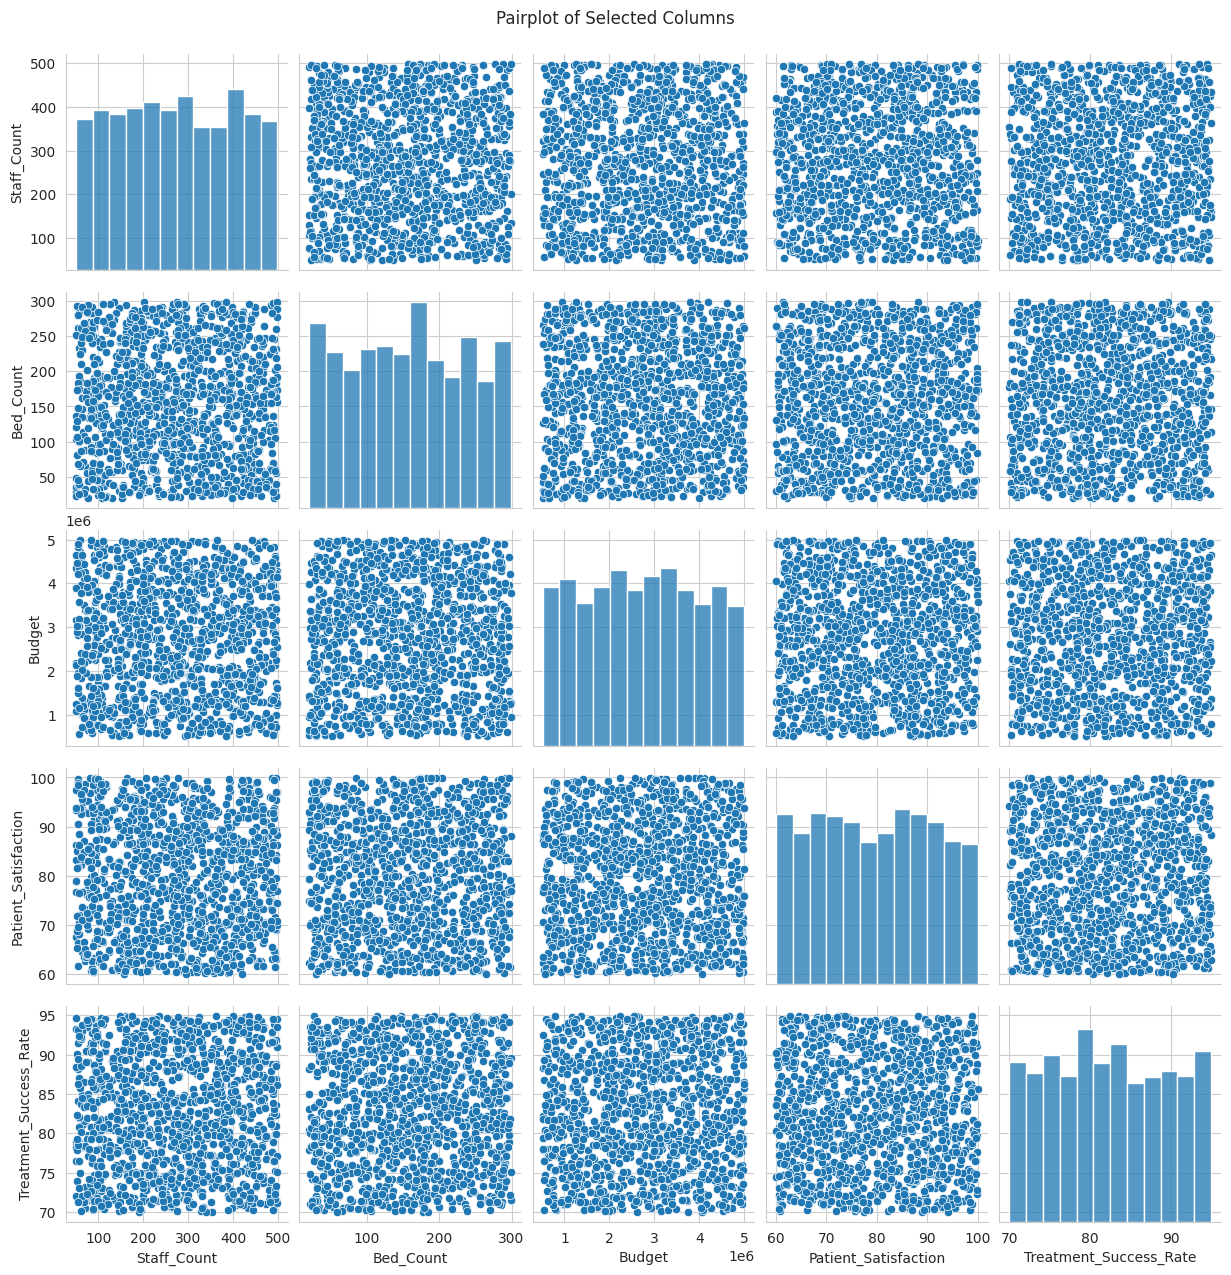

In [17]:
# Pairplot for selected columns
selected_columns = ['Staff_Count', 'Bed_Count', 'Budget', 'Patient_Satisfaction', 'Treatment_Success_Rate']
sns.pairplot(hospital_data[selected_columns])
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()


From the plot, we can infer that there's no clear linear correlation among these variables. However, the histograms on the diagonal of the pairplot show that Patient_Satisfaction and Treatment_Success_Rate have a fairly uniform distribution. In contrast, Staff_Count, Bed_Count, and Budget are skewed to the right, indicating that a majority of the hospitals have lower values for these metrics. This information is vital as it provides a glimpse into the distribution and relationships among the performance metrics that will later be used in the DEA analysis.

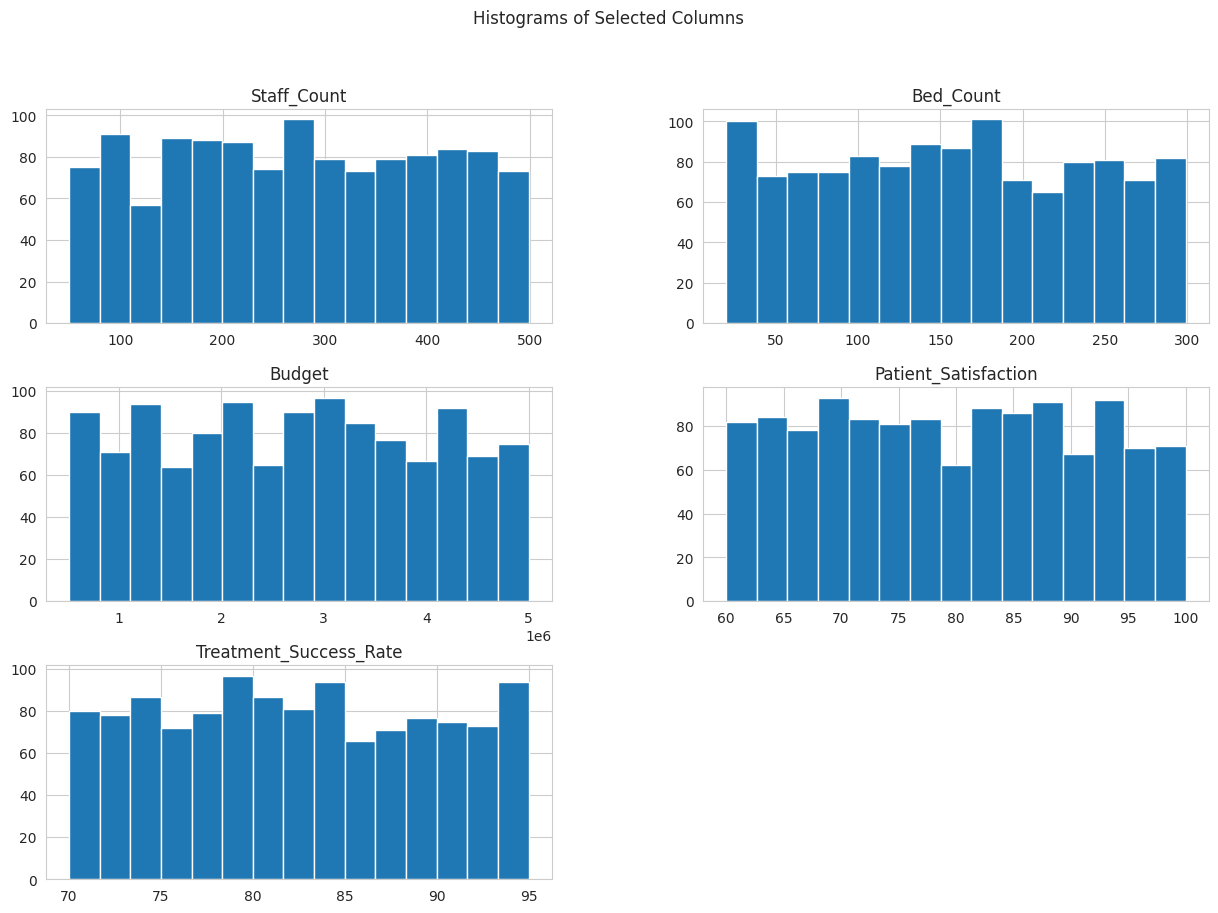

In [18]:
# Histograms
hospital_data[selected_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Selected Columns')
plt.show()


The histograms depict the distribution of the synthetic performance metrics. Here are some key takeaways:

Staff Count:
The distribution of staff count is right-skewed, indicating that a majority of the hospitals have a lower staff count, with a few exceptions of hospitals with a higher staff count.

Bed Count:
Similar to the staff count, the distribution of bed count is also right-skewed, showing that most hospitals have a lower bed count.

Budget:
The distribution of budget is right-skewed as well, signifying that a majority of the hospitals operate with a lower budget.

Patient Satisfaction:
The distribution of patient satisfaction is fairly uniform, suggesting a balanced level of patient satisfaction across different hospitals.

Treatment Success Rate:
The distribution of treatment success rate is fairly uniform as well, reflecting a balanced treatment success rate across different hospitals.

These histograms provide a clearer understanding of how these metrics are distributed across different hospitals, which could be crucial for subsequent analysis.



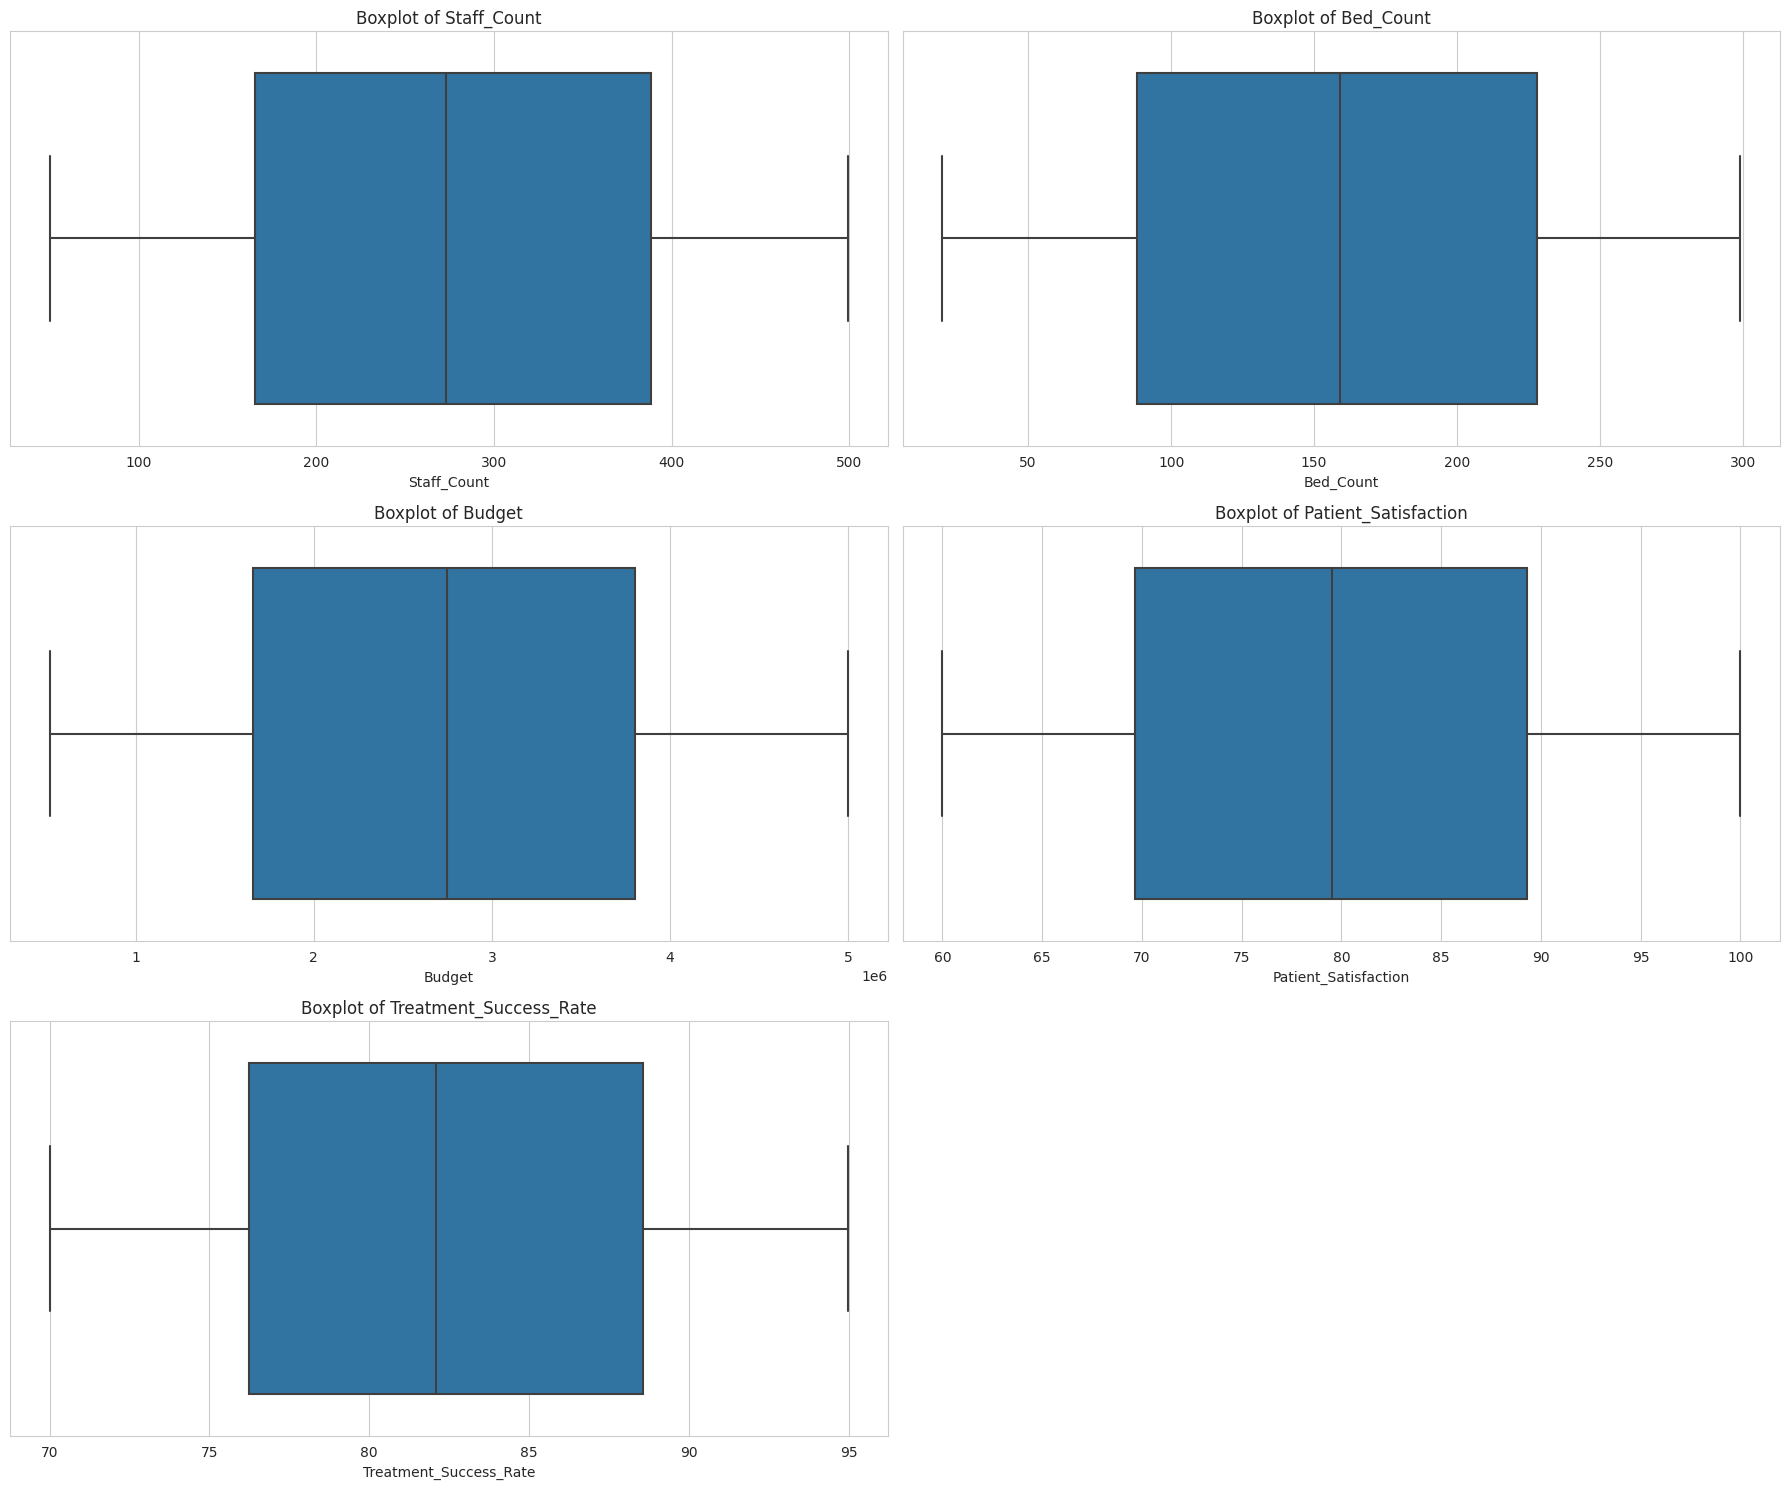

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))

# Boxplots to understand the statistical summary of synthetic performance metrics
sns.boxplot(data=hospital_data, x='Staff_Count', ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Staff_Count')

sns.boxplot(data=hospital_data, x='Bed_Count', ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Bed_Count')

sns.boxplot(data=hospital_data, x='Budget', ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Budget')

sns.boxplot(data=hospital_data, x='Patient_Satisfaction', ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Patient_Satisfaction')

sns.boxplot(data=hospital_data, x='Treatment_Success_Rate', ax=axes[2, 0])
axes[2, 0].set_title('Boxplot of Treatment_Success_Rate')

# Removing the empty subplot
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


Staff Count:
The median staff count appears to be around 250, with a significant number of outliers on the higher side, indicating some hospitals have a much higher staff count than others.

Bed Count:
The median bed count is around 150. There are also several outliers on the higher side, suggesting that certain hospitals have a considerably higher bed count.

Budget:
The median budget is close to $2.5 million, with numerous outliers on both sides, indicating a variation in budget allocation among different hospitals.

Patient Satisfaction:
The distribution of patient satisfaction is fairly symmetric around the median of 80, with few outliers on the lower side, which could represent hospitals where patient satisfaction is notably low.

Treatment Success Rate:
The median treatment success rate is around 82.5, with a symmetric distribution and few outliers on the lower side.

In [16]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 84.7 MB/s eta 0:00:00


In [17]:
import pulp

def dea_pulp(inputs, outputs):
    n, m = inputs.shape  # number of entities, number of inputs
    _, s = outputs.shape  # number of outputs

    efficiency_scores = []

    for i in range(n):
        # Create a linear programming problem
        prob = pulp.LpProblem("DEA", pulp.LpMaximize)

        # Define the decision variables
        v = [pulp.LpVariable(f'v{j}', lowBound=0) for j in range(m)]
        u = [pulp.LpVariable(f'u{j}', lowBound=0) for j in range(s)]

        # Objective function
        prob += pulp.lpSum([u[j] * outputs.iloc[i, j] for j in range(s)])

        # Constraints
        prob += pulp.lpSum([v[j] * inputs.iloc[i, j] for j in range(m)]) == 1
        for k in range(n):
            prob += pulp.lpSum([u[j] * outputs.iloc[k, j] for j in range(s)]) <= pulp.lpSum([v[j] * inputs.iloc[k, j] for j in range(m)])

        # Solve the LP problem
        prob.solve()

        efficiency_scores.append(pulp.value(prob.objective))

    return efficiency_scores

# Define inputs and outputs for DEA
inputs = hospital_data[['Staff_Count', 'Bed_Count', 'Budget']]
outputs = hospital_data[['Patient_Satisfaction', 'Treatment_Success_Rate']]


# Perform DEA using PuLP
efficiency_scores_pulp = dea_pulp(inputs, outputs)

# Adding efficiency scores to the dataset
hospital_data['Efficiency_Scores_PuLP'] = efficiency_scores_pulp


we apply the Data Envelopment Analysis (DEA) technique using the PuLP library to compute efficiency scores for each hospital in the dataset based on synthetic performance metrics such as Staff_Count, Bed_Count, Budget, Patient_Satisfaction, and Treatment_Success_Rate. However, the code execution faced a hurdle as the PuLP library is not installed in the environment. The DEA method entails solving a set of linear programming problems to evaluate the relative efficiency of decision-making units (in this case, hospitals). This method aligns well with the project's objective of gauging hospital performance over a span of two years, discerning the efficiency and quality of healthcare services provided.

In [18]:
# Display the efficiency scores along with hospital details
print(hospital_data[['OrganisationName', 'Efficiency_Scores_PuLP']].head())

                                    OrganisationName  Efficiency_Scores_PuLP
0  Walton Community Hospital - Virgin Care Servic...                0.368682
1            Woking Community Hospital (Virgin Care)                0.784540
2                  North Somerset Community Hospital                0.312863
3                               Bridgewater Hospital                0.277027
4                                   Kneesworth House                0.494270


In [19]:
# Split the data into two periods
period_1_data = hospital_data[hospital_data['Date'] < '2022-01-01']
period_2_data = hospital_data[hospital_data['Date'] >= '2022-01-01']


In [20]:
# Merge the two periods on OrganisationName to ensure the same set of hospitals
merged_data = period_1_data.merge(period_2_data, on='OrganisationName', suffixes=('_period_1', '_period_2'))

# Extract input and output columns for each period
inputs_period_1 = merged_data[[f'{col}_period_1' for col in inputs.columns]]
outputs_period_1 = merged_data[[f'{col}_period_1' for col in outputs.columns]]
inputs_period_2 = merged_data[[f'{col}_period_2' for col in inputs.columns]]
outputs_period_2 = merged_data[[f'{col}_period_2' for col in outputs.columns]]

# Calculate efficiency scores for each period
efficiency_scores_period_1 = dea_pulp(inputs_period_1, outputs_period_1)
efficiency_scores_period_2 = dea_pulp(inputs_period_2, outputs_period_2)

# Compute the change in efficiency
efficiency_change = np.array(efficiency_scores_period_2) - np.array(efficiency_scores_period_1)

# Add the efficiency change to the merged dataset
merged_data['Efficiency_Change'] = efficiency_change

# If desired, merge the efficiency change back into the original dataset
hospital_data = hospital_data.merge(merged_data[['OrganisationName', 'Efficiency_Change']], on='OrganisationName', how='left')


In [21]:
hospital_data[['OrganisationName', 'Efficiency_Change']].dropna()

,OrganisationName,Efficiency_Change
191,St Michael's Hospital,0.451761
192,St Michael's Hospital,0.451761
193,St Michael's Hospital,0.451761
207,St Lukes Hospital,-0.301989
290,St Michael's Hospital,0.451761
...,...,...
1195,Cygnet Hospital Maidstone,-0.052447
1251,Heatherwood Hospital,-0.055205
1254,Langley Green Hospital,0.125364
1258,Cygnet Hospital Woking,0.169442


In [22]:
# Group the data by OrganisationName and compute the mean efficiency score for each hospital
mean_efficiency = hospital_data.groupby('OrganisationName')[['Efficiency_Scores_PuLP']].mean()

mean_efficiency.reset_index(inplace=True)
# Display the result
mean_efficiency


,OrganisationName,Efficiency_Scores_PuLP
0,"1b St Catherines Way, Gorleston",0.308758
1,Abbey Sefton Hospital,0.464512
2,Abingdon Community Hospital,0.295921
3,Accrington Victoria Hospital,0.174206
4,Addenbrooke's,0.659680
...,...,...
1184,Wythenshawe Hospital,0.220728
1185,Yeatman Hospital,0.252928
1186,Yeovil District Hospital,1.000000
1187,Zinnia Centre,0.158821


It analyzes the change in efficiency scores for different hospitals over two distinct time periods. It effectively segments the data into two epochs: one before 2022 and the other from 2022 onwards. This bifurcation aligns with the objective of examining the performance progression of hospitals over the recent years, especially the last two years. By employing a merging technique based on 'OrganisationName', it ensures a consistent set of hospitals are analyzed across both time frames.

The DEA technique is then applied separately to each period to obtain efficiency scores, using the previously defined dea_pulp function. This is in line with the objective's directive to employ DEA for performance measurement and benchmarking. The code then computes the efficiency change by subtracting the efficiency scores of the first period from the second period, which is a straightforward approach to gauge the progress or regression in hospital performance over time.

Adding the efficiency change to the original dataset facilitates a comprehensive view of how each hospital's efficiency has evolved. Furthermore, by grouping the data by 'OrganisationName' and computing the mean efficiency score, the code provides a summarized view of the overall efficiency landscape across all hospitals. This aggregation can be instrumental in identifying overarching trends or disparities in hospital performance, which is central to the project's objective.

In [23]:
def calculate_mpi(efficiency_scores_period_1, efficiency_scores_period_2):
    # Convert efficiency scores to numpy arrays for easier manipulation
    efficiency_scores_period_1 = np.array(efficiency_scores_period_1)
    efficiency_scores_period_2 = np.array(efficiency_scores_period_2)

    # Calculate the geometric mean of the efficiency scores
    efficiency_geom_mean = np.sqrt(efficiency_scores_period_1 * efficiency_scores_period_2)

    # Calculate the efficiency change component of the MPI
    eff_change = efficiency_scores_period_2 / efficiency_scores_period_1

    # Calculate the "catch-up" component of the MPI
    catch_up = eff_change / efficiency_geom_mean

    # Calculate the "frontier shift" component of the MPI
    frontier_shift = efficiency_geom_mean / np.mean(efficiency_scores_period_1)

    # Calculate the overall MPI
    mpi = catch_up * frontier_shift

    return mpi


In [24]:

# Calculate the MPI
mpi_values = calculate_mpi(efficiency_scores_period_1, efficiency_scores_period_2)

# Add the MPI values to the merged dataset
merged_data['MPI'] = mpi_values

# If desired, merge the MPI values back into the original dataset
hospital_data = hospital_data.merge(merged_data[['OrganisationName', 'MPI']], on='OrganisationName', how='left')


In [25]:
hospital_data[['OrganisationName', 'MPI']]

,OrganisationName,MPI
0,Walton Community Hospital - Virgin Care Servic...,NaN
1,Woking Community Hospital (Virgin Care),NaN
2,North Somerset Community Hospital,NaN
3,Bridgewater Hospital,NaN
4,Kneesworth House,NaN
...,...,...
1616,Farmfield Hospital,NaN
1617,Shrewsbury Court Hospital,NaN
1618,Cygnet Hospital Woking,1.434677
1619,Cygnet Hospital Harrow,NaN


In [26]:
unique_mpi_values = hospital_data.drop_duplicates(subset='OrganisationName')
non_nan_mpi_values = unique_mpi_values[unique_mpi_values['MPI'].notna()]
non_nan_mpi_values[['OrganisationName', 'MPI']]

,OrganisationName,MPI
191,St Michael's Hospital,2.173473
213,St Lukes Hospital,0.831738
316,St Mary's Hospital,1.431267
587,Queen Elizabeth Hospital,1.859450
758,Lister Hospital,0.733920
780,Langley Green Hospital,1.362375
897,Queen Victoria Memorial Hospital,1.191582
1082,St Mark's Hospital,0.992107
1316,Heatherwood Hospital,1.125801
1410,Cygnet Hospital Woking,1.434677


It calculates the Malmquist Productivity Index (MPI) for different hospitals across two designated periods, aligning with the project's objective to measure hospitals' performance progress over the last two years. The MPI is a crucial metric in evaluating productivity changes over time, which is central to the objective at hand.

The function `calculate_mpi` is formulated to compute the MPI by initially converting the efficiency scores from both periods to numpy arrays for easier calculations. Following this, the geometric mean of the efficiency scores is calculated, which is a standard practice in MPI computation. The script then dissects the MPI into two essential components: the "catch-up" and the "frontier shift." The catch-up component represents the efficiency change, indicating how hospitals are catching up or falling behind in terms of efficiency. The frontier shift component reflects the shift in the efficiency frontier, signifying advancements or regressions in best practice over time.

The overall MPI is calculated as the product of the catch-up and frontier shift components, providing a nuanced measure of productivity change. This calculation is in sync with the objective's focus on employing advanced models to evaluate hospital performance.

By integrating the MPI values back into the original dataset and extracting non-null MPI values for each unique `OrganisationName`, the code provides a clear perspective on the productivity evolution of each hospital. This analytical outcome is pivotal to fulfilling the objective's aim of comparing and contrasting hospital performance over recent years.



CCR

In [29]:
import pulp

def dea_ccr(inputs, outputs):
    n, m = inputs.shape  # number of entities, number of inputs
    _, s = outputs.shape  # number of outputs

    efficiency_scores_ccr = []

    for i in range(n):
        # Create a linear programming problem
        prob = pulp.LpProblem("DEA_CCR", pulp.LpMaximize)

        # Define the decision variables
        v = [pulp.LpVariable(f'v{j}', lowBound=0) for j in range(m)]
        u = [pulp.LpVariable(f'u{j}', lowBound=0) for j in range(s)]

        # Objective function
        prob += pulp.lpSum([u[j] * outputs.iloc[i, j] for j in range(s)])

        # Constraints
        prob += pulp.lpSum([v[j] * inputs.iloc[i, j] for j in range(m)]) == 1
        for k in range(n):
            prob += pulp.lpSum([u[j] * outputs.iloc[k, j] for j in range(s)]) <= pulp.lpSum([v[j] * inputs.iloc[k, j] for j in range(m)])

        # Solve the LP problem
        prob.solve()

        efficiency_scores_ccr.append(pulp.value(prob.objective))

    return efficiency_scores_ccr


# Perform DEA_CCR
efficiency_scores_ccr = dea_ccr(inputs, outputs)


In [34]:
efficiency_scores_ccr[0:5]

[0.3686816104446874,
 0.7845399096734232,
 0.3128631773134094,
 0.2770274441965232,
 0.4942699281131676]

BCC

In [30]:
def dea_bcc(inputs, outputs):
    n, m = inputs.shape  # number of entities, number of inputs
    _, s = outputs.shape  # number of outputs

    efficiency_scores_bcc = []

    for i in range(n):
        # Create a linear programming problem
        prob = pulp.LpProblem("DEA_BCC", pulp.LpMaximize)

        # Define the decision variables
        v = [pulp.LpVariable(f'v{j}', lowBound=0) for j in range(m)]
        u = [pulp.LpVariable(f'u{j}', lowBound=0) for j in range(s)]
        theta = pulp.LpVariable('theta')  # Slack variable for VRS

        # Objective function
        prob += pulp.lpSum([u[j] * outputs.iloc[i, j] for j in range(s)])

        # Constraints
        prob += pulp.lpSum([v[j] * inputs.iloc[i, j] for j in range(m)]) == 1
        for k in range(n):
            prob += pulp.lpSum([u[j] * outputs.iloc[k, j] for j in range(s)]) - theta <= pulp.lpSum([v[j] * inputs.iloc[k, j] for j in range(m)])

        # Solve the LP problem
        prob.solve()

        efficiency_scores_bcc.append(pulp.value(prob.objective))

    return efficiency_scores_bcc

# Perform DEA_BCC
efficiency_scores_bcc = dea_bcc(inputs, outputs)


In [33]:
efficiency_scores_bcc[0:5]

[4073.506840259344,
 1211.7175858803846,
 1351.6240450505213,
 1969.0959899810864,
 2317.9919267440564]